<a href="https://colab.research.google.com/github/m12amiri/DIP-Final-Project/blob/main/AMIRI_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***نصب پکیج‌ها***

In [4]:
!pip install ultralytics
!apt-get install -y unrar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# ***وارد کردن کتابخانه‌ها***

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import drive
import shutil
import time
import zipfile
import subprocess

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# ***دانلود فایل از Google Drive***

In [6]:
!pip install --upgrade --no-no-cache-dir gdown
!gdown 1hKfkkZfg9vTcYO-y36LoWiAaYMqjHljF


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-no-cache-dir
Downloading...
From (original): https://drive.google.com/uc?id=1hKfkkZfg9vTcYO-y36LoWiAaYMqjHljF
From (redirected): https://drive.google.com/uc?id=1hKfkkZfg9vTcYO-y36LoWiAaYMqjHljF&confirm=t&uuid=2d400076-860b-4c16-ac50-a299613e9f62
To: /content/New folder.rar
100% 233M/233M [00:02<00:00, 98.5MB/s]


# ***استخراج داده‌ها از فایل RAR***

In [7]:
def extract_data(rar_file, destination_dir):
    try:
        if not os.path.exists(destination_dir):
            os.makedirs(destination_dir)

        result = subprocess.run(["unrar", "x", rar_file, destination_dir], capture_output=True, text=True)

        if result.returncode == 0:
            print("Data extracted successfully.")
        else:
            print(f"Error extracting data:\n{result.stderr}")

    except Exception as e:
        print(f"Error: {e}")

rar_file = "/content/New folder.rar"
destination_dir = "/content/New_folder_extracted/"

extract_data(rar_file, destination_dir)


Data extracted successfully.


# ***بارگذاری مدل YOLO 9***

In [8]:
def load_model(model_path="yolov9m.pt"):
    try:
        model = YOLO(model_path)
        print("Model loaded successfully.")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

model = load_model()

100%|██████████| 39.1M/39.1M [00:00<00:00, 56.7MB/s]

Model loaded successfully.


# ***تنظیم مسیر فایل YAML برای داده‌ها***

In [9]:
data_yaml = "/content/New_folder_extracted/data.yaml"

# ***آموزش مدل با ذخیره پیشرفت***

In [10]:
def train_model(model, data_yaml, epochs=24, img_size=640, save_dir="runs/train"):
    try:
        results = model.train(data=data_yaml, epochs=epochs, imgsz=img_size, project=save_dir)
        print(f"Training completed. Results saved at {save_dir}")
        return results
    except Exception as e:
        print(f"Error during training: {e}")
        return None

results = train_model(model, data_yaml)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=/content/New_folder_extracted/data.yaml, epochs=24, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 22.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1    171648  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 128, 128, 64, 1]         
  3                  -1  1    276960  ultralytics.nn.modules.block.AConv           [128, 240]                    
  4                  -1  1    629520  ultralytics.nn.modules.block.RepNCSPELAN4    [240, 240, 240, 120, 1]       
  5                  -1  1    778320  ultralytics.nn.modules.block.AConv           [240, 360]                    
  6                  -1  1   1414080  ultralytics.nn.modules.block.RepNCSPELAN4    [360, 360, 360, 180, 1]       
  7                  -1  1   1556160  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅


train: Scanning /content/New_folder_extracted/train/labels... 3940 images, 555 backgrounds, 0 corrupt: 100%|██████████| 3940/3940 [00:01<00:00, 2448.58it/s]


train: New cache created: /content/New_folder_extracted/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 6228. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/New_folder_extracted/valid/labels... 1017 images, 105 backgrounds, 0 corrupt: 100%|██████████| 1017/1017 [00:00<00:00, 1068.23it/s]


val: New cache created: /content/New_folder_extracted/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 1654. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/train/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/train
Starting training for 24 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/24      8.47G      2.086      2.738      2.166          9        640: 100%|██████████| 247/247 [02:45<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all       1017       1654       0.13      0.161     0.0821     0.0276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/24      8.34G      2.175      2.655      2.202         17        640: 100%|██████████| 247/247 [02:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]

                   all       1017       1654      0.134      0.129     0.0503     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/24      8.35G      2.117      2.558       2.16         10        640: 100%|██████████| 247/247 [02:40<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.88it/s]

                   all       1017       1654      0.271      0.343      0.197     0.0718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/24      8.38G      2.094      2.489      2.123         14        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1017       1654      0.234      0.302      0.202     0.0785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/24      8.42G      2.018      2.341      2.034         13        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]

                   all       1017       1654      0.372       0.36       0.31      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/24      8.33G      2.019      2.311      2.037          9        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]

                   all       1017       1654      0.445      0.316      0.325      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/24      8.32G      1.959      2.215      1.986          2        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]

                   all       1017       1654      0.426      0.404      0.358      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/24      8.38G      1.945       2.18       1.96          8        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]

                   all       1017       1654      0.411      0.394      0.351      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/24      8.37G      1.912      2.171      1.946         17        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]

                   all       1017       1654      0.437      0.447      0.387      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/24      8.33G      1.902      2.095      1.938         17        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]

                   all       1017       1654      0.519      0.456      0.415      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/24      8.32G      1.871      2.069      1.907          9        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]

                   all       1017       1654       0.53      0.433      0.427      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/24      8.35G       1.87      2.079      1.905         16        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]

                   all       1017       1654      0.539      0.453      0.446      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/24      8.39G      1.838      2.007       1.87         10        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]

                   all       1017       1654      0.536      0.469      0.456      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/24      8.34G      1.833      1.977      1.864         11        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all       1017       1654       0.56      0.462      0.464      0.202


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/24       8.3G      1.902       1.99      1.979          5        640: 100%|██████████| 247/247 [02:39<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all       1017       1654      0.599      0.461      0.485      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/24      8.33G      1.881      1.908      1.949          7        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all       1017       1654      0.597      0.468      0.488      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/24      8.37G      1.863      1.878      1.934          5        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all       1017       1654      0.602      0.471      0.503      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/24      8.32G       1.85      1.838      1.925          6        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]

                   all       1017       1654      0.574       0.49      0.499      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/24      8.31G      1.833      1.816      1.901          4        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]

                   all       1017       1654      0.608      0.497      0.511      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/24      8.34G       1.79      1.769       1.88          8        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]

                   all       1017       1654      0.637      0.483      0.531      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/24      8.37G      1.785      1.744       1.87          7        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all       1017       1654      0.644      0.489      0.532      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/24      8.34G      1.766      1.713      1.855          6        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]

                   all       1017       1654       0.62      0.507      0.531      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/24       8.3G       1.76      1.708      1.857         10        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]

                   all       1017       1654      0.636      0.503      0.539      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/24      8.33G      1.737      1.683      1.834          3        640: 100%|██████████| 247/247 [02:38<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]

                   all       1017       1654      0.633       0.51      0.548      0.254



24 epochs completed in 1.212 hours.
Optimizer stripped from runs/train/train/weights/last.pt, 40.8MB
Optimizer stripped from runs/train/train/weights/best.pt, 40.8MB

Validating runs/train/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 374 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]


                   all       1017       1654      0.636      0.508      0.548      0.254
                  fire        836       1033      0.674       0.65      0.681      0.329
                 smoke        420        621      0.597      0.367      0.415      0.179
Speed: 0.2ms preprocess, 12.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/train/train
Training completed. Results saved at runs/train


# ***ارزیابی مدل و نمایش ماتریس سردرگمی***

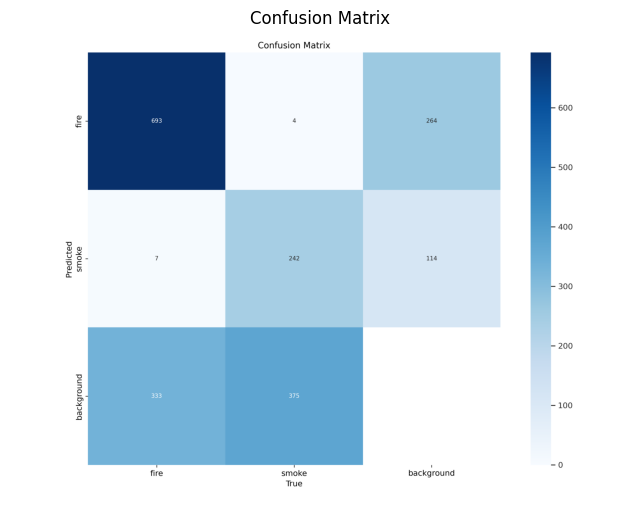

In [17]:
import cv2
import matplotlib.pyplot as plt
import os

def plot_confusion_matrix(conf_mat_path="/content/runs/train/train/confusion_matrix.png"):
    if not os.path.exists(conf_mat_path):
        print(f"File not found: {conf_mat_path}")
        return

    try:
        conf_mat = cv2.imread(conf_mat_path)
        if conf_mat is None:
            raise ValueError("Image could not be read. It may be corrupted or in an unsupported format.")

        conf_mat = cv2.cvtColor(conf_mat, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(conf_mat)
        plt.title("Confusion Matrix")
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"Error displaying confusion matrix: {e}")

plot_confusion_matrix()

# ***نمایش عملکرد مدل بر روی یک تصویر تصادفی از داده های ارزیابی***


image 1/1 /content/New_folder_extracted/test/images/pic-136-_jpg.rf.aac04d6ad2c418902cac7915f6f17c7b.jpg: 640x640 2 fires, 40.3ms
Speed: 2.2ms preprocess, 40.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/New_folder_extracted/test/images/fire14frame579_jpg.rf.c635063a99eeb1d8752e49dc6974537f.jpg: 640x640 1 fire, 40.3ms
Speed: 1.8ms preprocess, 40.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/New_folder_extracted/test/images/FireDataOne9796_png.rf.3b25a6f20ea1fe654ed4795ad9fe91f7.jpg: 640x640 3 fires, 37.0ms
Speed: 1.8ms preprocess, 37.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/New_folder_extracted/test/images/coolerbot2541_png.rf.ba03b1eef303b6a3f3439ebec1a35884.jpg: 640x640 (no detections), 32.7ms
Speed: 1.7ms preprocess, 32.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/New_folder_extracted/test/images/fire12fram

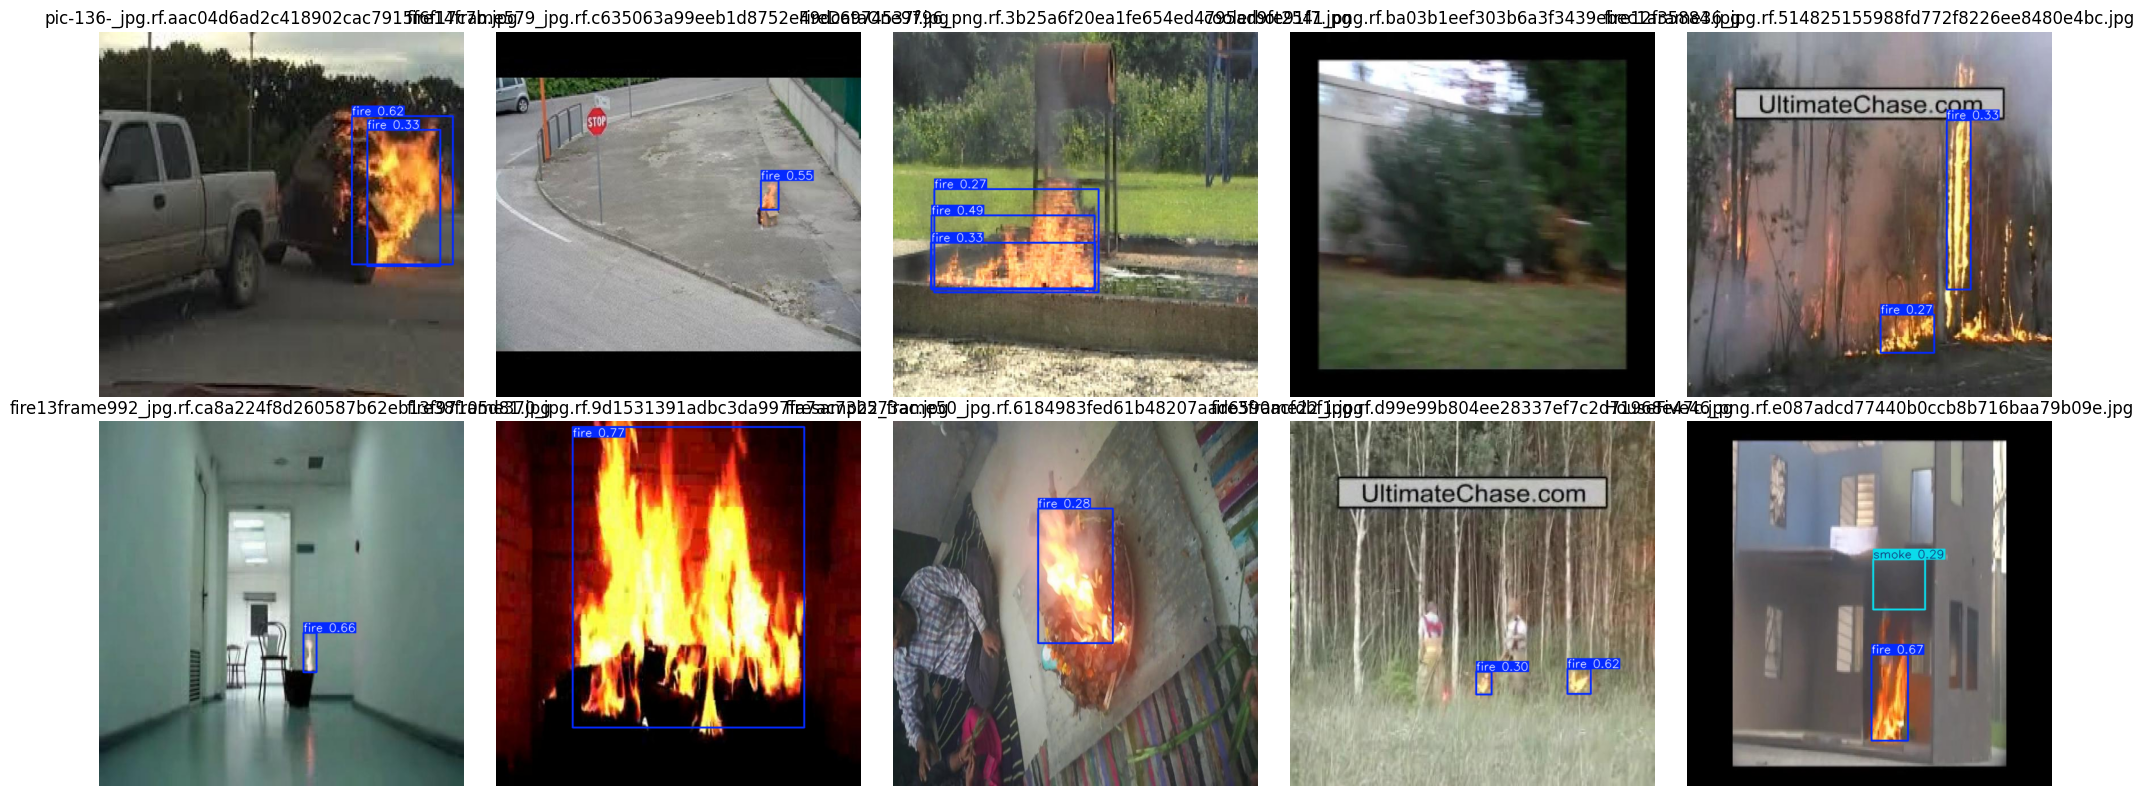

In [28]:
import os
import random
import cv2
import matplotlib.pyplot as plt

image_folder = '/content/New_folder_extracted/test/images/'

image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    raise FileNotFoundError(f"No image files found in folder: {image_folder}")

num_images_to_plot = 10
selected_images = random.sample(image_files, min(num_images_to_plot, len(image_files)))

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for ax, image_file in zip(axes, selected_images):
    image_path = os.path.join(image_folder, image_file)

    results = model.predict(source=image_path)
    annotated_image = results[0].plot()

    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    ax.imshow(annotated_image)
    ax.set_title(image_file)
    ax.axis('off')

plt.tight_layout()
plt.show()
